# 导入所需要的包

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

# 读入图片

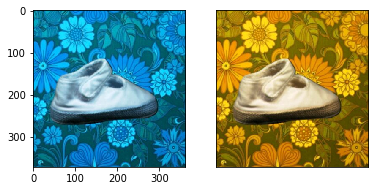

In [50]:
# 读入图片，用cv2读入，为bgr形式
image_ = cv2.imread('./test.png')
# 将图片转换为rgb形式，matplotlib为rbg形式
image = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
# 显示bgr形式图，错误！
plt.subplot(121),plt.imshow(image_) 
# 显示rgb形式图，正确！
plt.subplot(122)
plt.xticks([]), plt.yticks([]) 
plt.imshow(image)
plt.show()

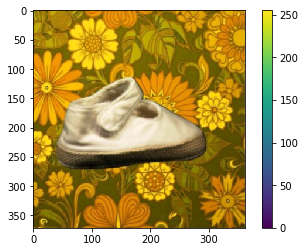

In [51]:
plt.imshow(image),plt.colorbar()
plt.show()

# SLIC处理

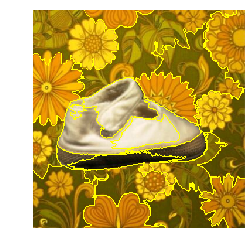

In [64]:
segments = slic(image, n_segments= 40)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()


# # 对分割的数量进行遍历
# for numSegments in (100, 200, 300):
#     # apply SLIC and extract (approximately) the supplied number
#     # of segments
#     segments = slic(image, n_segments = numSegments, sigma = 5)
 
#     # show the output of SLIC
#     fig = plt.figure("Superpixels -- %d segments" % (numSegments))
#     ax = fig.add_subplot(1, 1, 1)
#     ax.imshow(mark_boundaries(image, segments))
#     plt.axis("off")
# plt.show()

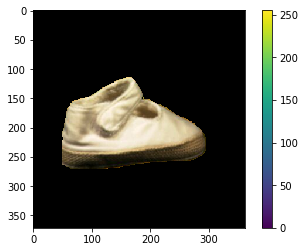

In [34]:
mask = np.zeros(image2.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(image2,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
#代码中将0和2合并为背景 1和3合并为前景
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image2 = image2*mask2[:,:,np.newaxis]
plt.imshow(image2),plt.colorbar()
plt.show()